In [1]:
import time
import numpy as np

import tssearch

/home/cgarvic/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
number_of_repetitions = 30

* The currently tested packages can only work with distances that do not allow the computation of data of different nature. For this reason, a public data set obtained from https://finance.yahoo.com/ has been used. All data are continuous.

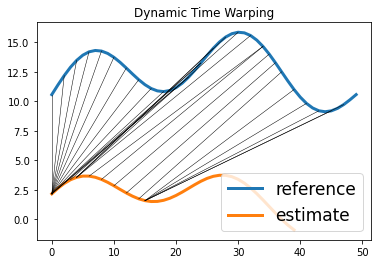

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tssearch.search.query_search import time_series_search
from tssearch.utils.visualisation import plot_alignment

# generates signals. Example with differents lengths
freq = 2
amp = 2
time = np.linspace(0, 2, 100)
ts1 = np.concatenate([amp * np.sin(np.pi * time), np.zeros(100), amp * np.sin(np.pi * time), np.zeros(10)])
ts2 = np.concatenate([np.zeros(10), amp * np.sin(np.pi * time), np.zeros(150), amp * np.sin(np.pi * time), np.zeros(5)])

time1 = np.linspace(start=0, stop=1, num=50)
time2 = time1[0:40]

ts1 = 3 * np.sin(np.pi * time1) + 2.5 * np.sin(4*np.pi * time1)
ts2 = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5) 

dict_distances = {
    "elastic": {"Dynamic Time Warping": {
        "multivariate": "yes",
        "description": "",
        "function": "dtw",
        "parameters": {"dtw_type": "dtw", "alpha": 1},
        "use": "yes"}
    }
}

result = time_series_search(dict_distances, ts1, ts2, output=("number", 1))

plt.figure()
plt.title("Dynamic Time Warping")
plot_alignment(ts1, ts2, result["Dynamic Time Warping"]["path"][0])
plt.legend(fontsize=17, loc="lower right")

## Comparativa tiempo computacional distintas distancias

### tslearn

In [1]:
import numpy as np
import time
from tslearn.metrics import dtw, dtw_path_from_metric

X = np.load('../../../Data/E2_FinanceData/FinanceData_20days.npy', allow_pickle=True)[0:75]
Y = X.copy()

init = time.time()
path, dis = dtw_path_from_metric(X[0], Y[1], metric="l1")
print(dis)
print("Tiempo: ", time.time()-init)

C:\Users\escud\anaconda3\envs\phd_work\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


115869656.06289998
Tiempo:  1.0830295085906982


In [1]:
import numpy as np
import time
from tslearn.metrics import dtw, dtw_path_from_metric

X = np.load('../../../Data/E2_FinanceData/FinanceData_20days.npy', allow_pickle=True)[0:75]
Y = X.copy()

init = time.time()
path, dis = dtw_path_from_metric(X[0], Y[1], metric="l2")
print(dis)
print("Tiempo: ", time.time()-init)

C:\Users\escud\anaconda3\envs\phd_work\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


115864700.6794787
Tiempo:  1.064481258392334


### dtwParallel

In [1]:
from dtwParallel import dtw_functions
import numpy as np
import time

X = np.load('../../../Data/E2_FinanceData/FinanceData_20days.npy', allow_pickle=True)[0:75]
Y = X.copy()


init = time.time()
distance_matrix = dtw_functions.dtw(X[0], Y[1], type_dtw="d", dist="norm1", MTS=True)
print(distance_matrix)
print("Tiempo: ", time.time()-init)

C:\Users\escud\anaconda3\envs\phd_work\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


45669.07859278735
Tiempo:  1.122077465057373


In [1]:
from dtwParallel import dtw_functions
import numpy as np
import time

X = np.load('../../../Data/E2_FinanceData/FinanceData_20days.npy', allow_pickle=True)[0:75]
Y = X.copy()

init = time.time()
distance_matrix = dtw_functions.dtw(X[0], Y[1], type_dtw="d", dist="norm2", MTS=True)
print(distance_matrix)
print("Tiempo: ", time.time()-init)

C:\Users\escud\anaconda3\envs\phd_work\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


115864700.67947873
Tiempo:  1.1951167583465576


## dtwParallel con nuevas implementaciones: 
* itakura
* sakoe_chiba

In [4]:
from dtwParallel import dtw_functions
from scipy.spatial import distance
import numpy as np
import time

class Input:
    def __init__(self):
        self.check_errors = False 
        # d, i, itakura o sakoe_chiba
        self.type_dtw = "d"
        self.sakoe_chiba_radius=None
        self.itakura_max_slope=None
        self.MTS = True
        self.regular_flag=0
        self.n_threads = -1
        self.distance = "norm1"
        self.visualization = False
        self.output_file = False
        self.DTW_to_kernel = False
        self.sigma = 1
        
        
X = np.load('../../../Data/E2_FinanceData/FinanceData_20days.npy', allow_pickle=True)[0:75]
Y = X.copy()

input_obj = Input()
init = time.time()
distance_matrix = dtw_functions.dtw_tensor_3d(X, Y, input_obj)
print(time.time()-init)
print("Dimensions: ", distance_matrix.shape)
print("\n", distance_matrix)

0.12601828575134277
Dimensions:  (75, 75)

 [[    0.         45669.07859279 19790.58799762 ... 15787.70085964
  18611.34158966 24902.46875394]
 [45669.07859279     0.         34841.733373   ... 49716.47572835
  49395.57014263 54003.58145564]
 [19790.58799762 34841.733373       0.         ... 27359.33911917
  28109.3856254  33550.12129758]
 ...
 [15787.70085964 49716.47572835 27359.33911917 ...     0.
  13747.59657461 17914.88370456]
 [18611.34158966 49395.57014263 28109.3856254  ... 13747.59657461
      0.         20538.58681089]
 [24902.46875394 54003.58145564 33550.12129758 ... 17914.88370456
  20538.58681089     0.        ]]


## Analizo si mejora tiempo computacional con threads o sin ellos. 

### Sin programación multihilo

In [1]:
from dtwParallel import dtw_functions
from scipy.spatial import distance
import numpy as np
import time

class Input:
    def __init__(self):
        self.check_errors = False 
        # d, i, itakura o sakoe_chiba
        self.type_dtw = "d"
        self.sakoe_chiba_radius=None
        self.itakura_max_slope=None
        self.MTS = True
        self.regular_flag=0
        self.n_threads = -1
        self.distance = "norm2"
        self.visualization = False
        self.output_file = False
        self.DTW_to_kernel = False
        self.sigma = 1
        
        
X = np.load('../../../Data/E2_FinanceData/FinanceData_20days.npy', allow_pickle=True)[0:250]
Y = X.copy()

input_obj = Input()
init = time.time()
distance_matrix = dtw_functions.dtw_tensor_3d(X, Y, input_obj)
print("Tiempo: ", time.time()-init)

C:\Users\escud\anaconda3\envs\phd_work\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


Tiempo:  2.778925895690918


### Con programacion multihilo

In [1]:
from dtwParallel import dtw_functions
from scipy.spatial import distance
import numpy as np
import time

class Input:
    def __init__(self):
        self.check_errors = False 
        # d, i, itakura o sakoe_chiba
        self.type_dtw = "d"
        self.sakoe_chiba_radius=None
        self.itakura_max_slope=None
        self.MTS = True
        self.regular_flag=0
        self.n_threads = -1
        self.distance = "norm2"
        self.visualization = False
        self.output_file = False
        self.DTW_to_kernel = False
        self.sigma = 1
        
        
X = np.load('../../../Data/E2_FinanceData/FinanceData_20days.npy', allow_pickle=True)[0:250]
Y = X.copy()

input_obj = Input()
init = time.time()
distance_matrix = dtw_functions.dtw_tensor_3d(X, Y, input_obj)
print("Tiempo: ", time.time()-init)

C:\Users\escud\anaconda3\envs\phd_work\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


Tiempo:  12.930042505264282


### Programación multihilo + euclidean distance

In [2]:
from dtwParallel import dtw_functions
from scipy.spatial import distance
import numpy as np
import time

class Input:
    def __init__(self):
        self.check_errors = False 
        # d, i, itakura o sakoe_chiba
        self.type_dtw = "d"
        self.sakoe_chiba_radius=None
        self.itakura_max_slope=None
        self.MTS = True
        self.regular_flag=0
        self.n_threads = -1
        self.distance = distance.euclidean
        self.visualization = False
        self.output_file = False
        self.DTW_to_kernel = False
        self.sigma = 1
        
        
X = np.load('../../../Data/E2_FinanceData/FinanceData_20days.npy', allow_pickle=True)[0:250]
Y = X.copy()

input_obj = Input()
init = time.time()
distance_matrix = dtw_functions.dtw_tensor_3d(X, Y, input_obj)
print("Tiempo: ", time.time()-init)

Tiempo:  103.75667238235474


In [1]:
from dtwParallel import dtw_functions
from scipy.spatial import distance
import numpy as np
import time

class Input:
    def __init__(self):
        self.check_errors = False 
        # d, i, itakura o sakoe_chiba
        self.type_dtw = "d"
        self.sakoe_chiba_radius=None
        self.itakura_max_slope=None
        self.MTS = True
        self.regular_flag=0
        self.n_threads = -1
        self.distance = "gower"
        self.visualization = False
        self.output_file = False
        self.DTW_to_kernel = False
        self.sigma = 1
        
        
X = np.load('../../../Data/E2_FinanceData/FinanceData_20days.npy', allow_pickle=True)[0:250]
Y = X.copy()

input_obj = Input()
init = time.time()
distance_matrix = dtw_functions.dtw_tensor_3d(X, Y, input_obj)
print("Tiempo: ", time.time()-init)

C:\Users\escud\anaconda3\envs\phd_work\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


KeyboardInterrupt: 

In [14]:
from numba import njit
import numpy

def to_time_series(ts):
    ts_out = numpy.array(ts, copy=True)
    if ts_out.ndim <= 1:
        ts_out = ts_out.reshape((-1, 1))
    if ts_out.dtype != float:
        ts_out = ts_out.astype('float64')
    
    return ts_out

@njit()
def euclideanDistance1(x, y):
    dist = 0.
    for di in range(x.shape[0]):
        #diff = np.abs(x[di] - y[di])
        #dist += diff * diff
        diff += (x[di] - y[di])**2
    return np.sqrt(dist)

    #return dist

def euclideanDistance2(s1,s2):
    diff = np.abs(s1-s2).astype('float64')
    return np.sqrt(np.dot(diff, diff.T))
    

@njit()
def njit_accumulated_matrix1(ts1, ts2):

    l1 = ts1.shape[0]
    l2 = ts2.shape[0]
    cost_matrix = numpy.full((l1 + 1, l2 + 1), numpy.inf)
    cost_matrix[0, 0] = 0.
    
    for i in range(l1):
        for j in range(l2):
            cost_matrix[i + 1, j + 1] = euclideanDistance1(s1[i], s2[j])
#             cost_matrix[i + 1, j + 1] = np.linalg.norm(s1[i] - s2[j], ord=2)
            cost_matrix[i + 1, j + 1] += min(cost_matrix[i, j + 1],
                                         cost_matrix[i + 1, j],
                                         cost_matrix[i, j])
    return cost_matrix[-1,-1]


# @njit(nogil=True)
# def njit_dtw(s1, s2):
#     cum_sum = njit_accumulated_matrix(s1, s2)
#     return numpy.sqrt(cum_sum[-1, -1])

In [15]:
import numpy as np
import time 


time1 = np.linspace(start=0, stop=1, num=2000)
time2 = time1[0:2000]

s1 = 3 * np.sin(np.pi * time1) + 2.5 * np.sin(4*np.pi * time1)
s2 = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5) 

s1 = to_time_series(s1)
s2 = to_time_series(s2)

init = time.time()
dtw_dist = njit_accumulated_matrix1(s1, s2)
print(time.time()-init)
print(dtw_dist)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.CallConstraint object at 0x000001C54527D910>.
[1m[1mFailed in nopython mode pipeline (step: analyzing bytecode)
[1mThe compiler failed to analyze the bytecode. Variable 'diff' is not defined.
[1m
File "..\..\..\..\..\..\..\AppData\Local\Temp\ipykernel_5288\462912892.py", line 19:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function euclideanDistance1 at 0x000001C5161DBDC0>))[0m
[0m[1mDuring: typing of call at C:\Users\escud\AppData\Local\Temp\ipykernel_5288\462912892.py (39)
[0m
Enable logging at debug level for details.
[1m
File "..\..\..\..\..\..\..\AppData\Local\Temp\ipykernel_5288\462912892.py", line 39:[0m
[1m<source missing, REPL/exec in use?>[0m


In [3]:
from numba import njit
import numpy

def to_time_series(ts):
    ts_out = numpy.array(ts, copy=True)
    if ts_out.ndim <= 1:
        ts_out = ts_out.reshape((-1, 1))
    if ts_out.dtype != float:
        ts_out = ts_out.astype('float64')
    
    return ts_out

@njit()
def euclideanDistance2(s1,s2):
    diff = np.abs(s1-s2).astype('float64')
    return np.sqrt(np.dot(diff, diff.T))
    
@njit()
def njit_accumulated_matrix2(ts1, ts2):

    l1 = ts1.shape[0]
    l2 = ts2.shape[0]
    cost_matrix = numpy.full((l1 + 1, l2 + 1), numpy.inf)
    cost_matrix[0, 0] = 0.
    
    m = euclideanDistance2(s1,s2)
    for i in range(l1):
        for j in range(l2):
            cost_matrix[i + 1, j + 1] = m[i,j] + min(cost_matrix[i, j + 1],
                                         cost_matrix[i + 1, j],
                                         cost_matrix[i, j])
    return cost_matrix[-1,-1]


In [6]:
import numpy
import numpy as np
import time 

time1 = np.linspace(start=0, stop=1, num=2000)
time2 = time1[0:1000]

s1 = 3 * np.sin(np.pi * time1) + 2.5 * np.sin(4*np.pi * time1)
s2 = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5) 

s1 = to_time_series(s1)
s2 = to_time_series(s2)

init = time.time()
dtw_dist = njit_accumulated_matrix2(s1, s2)
print(time.time()-init)
print(dtw_dist)

0.03827071189880371
512.8947938993211


In [56]:

def _local_squared_dist(x, y):
    dist = 0.
    for di in range(x.shape[0]):
        diff = np.abs(x[di] - y[di])
        dist += diff * diff
    return np.sqrt(dist)

    return m

l1 = s1.shape[0]
l2 = s2.shape[0]
cost_matrix = np.zeros((l1, l2))


for i in range(l1):
    for j in range(l2):
        cost_matrix[i, j] = _local_squared_dist(s1[i], s2[j])

cost_matrix

C:\Users\escud\AppData\Local\Temp\ipykernel_10012\1439351001.py:5: RuntimeWarning: overflow encountered in long_scalars
  dist += diff * diff
C:\Users\escud\AppData\Local\Temp\ipykernel_10012\1439351001.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(dist)


array([[37176.20752551,            nan,            nan,            nan,
        40568.30512143, 41971.57696197,            nan,            nan,
                   nan, 23081.86473236, 39123.16748558, 14173.61257703,
        33100.88499284, 46210.87515261,            nan, 40267.54017535,
        45240.27740272,            nan, 42520.86764618, 45468.75008423],
       [           nan,            nan, 16270.23105597, 16270.23206514,
        25713.77071037, 43933.68703424, 40334.05404462, 40139.5352346 ,
                   nan, 20688.09588747,            nan,            nan,
        20366.42204643,            nan,            nan,            nan,
                   nan, 32651.21466331, 23226.31871341,  4442.77412141],
       [15400.17180758, 31806.55275016,            nan,            nan,
                   nan,            nan, 19800.14026864, 13665.13314089,
        39787.35182295, 40212.74831094, 44672.34169455,            nan,
        25371.99499803, 28199.89385742, 28714.87269838, 27464.

In [58]:

m

array([[  239200.0109824 ,  1266048.65829941,   490131.17136788,
          565665.84233508,   588687.4937664 ,   531817.71827188,
          169845.59293209,  1235381.62742885,  1427311.65673889,
         2051383.39799006,  2313434.76358945,  1678359.60552677,
         1633683.52058898,  1054397.34705938,  1178562.88990496,
         1244237.24642034,  1356121.41244024,  1682828.78665509,
         1330578.37238981,  1449421.2103574 ],
       [ 1266048.65829941,  6701000.00038148,  2594188.56390185,
         2993981.91462707,  3115831.96036707,  2814829.01885604,
          898966.40947482,  6538684.14173032,  7554540.14519667,
        10857655.48843183, 12244652.89443976,  8883298.16596236,
         8646834.5482824 ,  5580762.29608566,  6237951.33881201,
         6585555.56542546,  7177741.17708399,  8906952.85185254,
         7042545.81135274,  7671562.5986474 ],
       [  490131.17136788,  2594188.56390185,  1004300.00251295,
         1159073.81778763,  1206246.17935646,  1089717.543843

In [48]:
t = diff.T
t[0].shape

(20,)

In [50]:
diff[0]

array([1.52563e+01, 3.44400e+01, 3.76250e+01, 3.44850e+01, 3.50750e+01,
       2.39200e+05])

In [38]:
m1 = np.array([[1,4,7],[2,5,8]])
m2 = np.array([[1,4],[2,5],[3,6]])
m3 = np.dot(m1,m2) 


In [2]:
from dtwParallel import dtw_functions
import numpy as np 
import time

time1 = np.linspace(start=0, stop=1, num=15)
time2 = time1[0:15]

x1 = 3 * np.sin(np.pi * time1) + 2.5 * np.sin(4*np.pi * time1)
x2 = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5) 

# init = time.time()
# distances, D = dtw_functions.dtw_dep2(x1,x2,"euclidean")
# print(time.time()-init)
# distances

In [19]:
diff = np.abs(x1-x2)
m = np.sqrt(diff * diff.reshape(-1,1))
m.shape

(15, 15)

In [16]:
np.sqrt(m)

array([[2.15741492, 1.34897115, 0.61878031, 0.75749452, 1.01258334,
        1.66636867, 1.69759187, 0.87130023, 1.57862466, 2.21245597,
        2.24942425, 1.79161193, 0.99756208, 0.48751742, 1.24558409],
       [1.34897115, 0.8434739 , 0.386906  , 0.47364012, 0.63314002,
        1.04193368, 1.06145667, 0.54479964, 0.98706981, 1.38338678,
        1.40650201, 1.12024479, 0.62374764, 0.304831  , 0.77882886],
       [0.61878031, 0.386906  , 0.17747586, 0.21726126, 0.29042472,
        0.47794057, 0.48689587, 0.24990252, 0.45277422, 0.63456694,
        0.64517002, 0.51386229, 0.28611639, 0.13982761, 0.35725298],
       [0.75749452, 0.47364012, 0.21726126, 0.2659655 , 0.35553028,
        0.58508223, 0.59604507, 0.30592407, 0.55427425, 0.7768201 ,
        0.78980011, 0.62905666, 0.35025613, 0.17117327, 0.43733966],
       [1.01258334, 0.63314002, 0.29042472, 0.35553028, 0.4752563 ,
        0.78211064, 0.79676525, 0.40894503, 0.74092796, 1.03841687,
        1.05576795, 0.8408936 , 0.46820606, 

In [18]:
from numba import njit, prange
import numpy

In [4]:
from fastdtw import fastdtw
from scipy.spatial import distance as d
x = [4,2,8,4,5]
y = [0,1,0,8,9]
distance, path = fastdtw(x, y, dist=d.euclidean)

In [6]:
np.sqrt(distance)

3.872983346207417

15.0

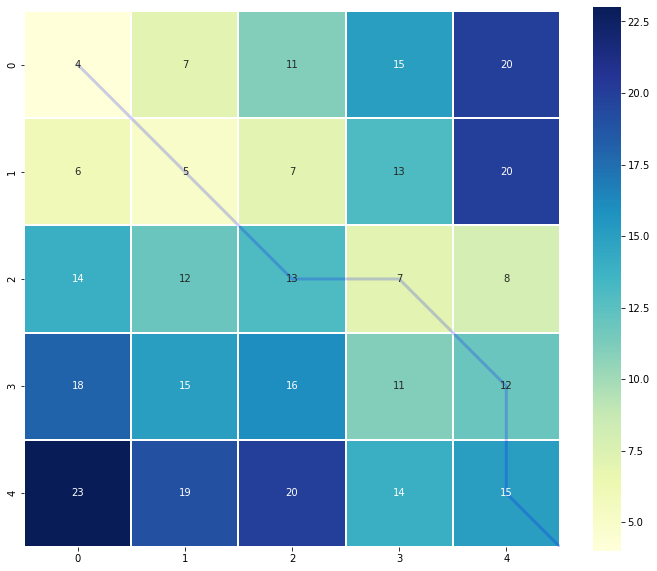

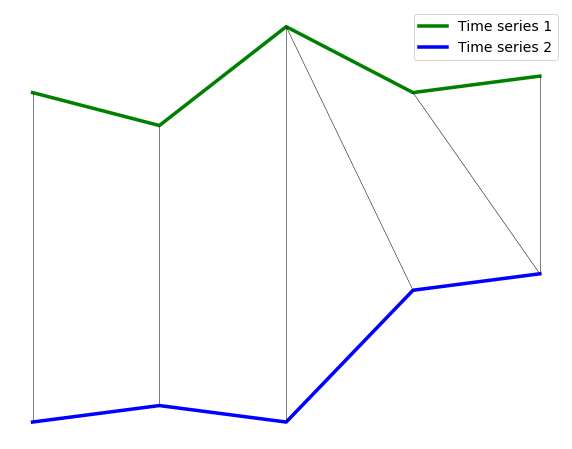

In [55]:
import numpy as np
from dtwParallel import dtw_functions
from scipy.spatial import distance as d

x = [4,2,8,4,5]
y = [0,1,0,8,9]

distance = d.euclidean
visualization=True
dtw_functions.dtw(x, y, distance, get_visualization=visualization)

In [56]:
from tslearn.metrics import dtw


x = [4,2,8,4,5]
y = [0,1,0,8,9]

dtw(x,y)

C:\Users\escud\anaconda3\envs\phd_work\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


7.280109889280518

In [21]:
from dtwParallel import dtw_functions
import numpy as np
from scipy.spatial import distance
from numba import njit
import numpy

time1 = np.linspace(start=0, stop=1, num=1500)
time2 = time1[0:1500]

x1 = 3 * np.sin(np.pi * time1) + 2.5 * np.sin(4*np.pi * time1)
x2 = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5) 

@njit()
def dtw_dep2(x, y):
    D = numpy.full((len(x)+1, len(y)+1), numpy.inf)
    D[0, 0] = 0.

    for i in range(len(x)):
        for j in range(len(y)):
            D[i + 1, j + 1] = numpy.abs(x[i] - y[j])**2
            D[i + 1, j + 1] += min(D[i, j + 1],
                                   D[i + 1, j],
                                   D[i, j])

    return D[-1, -1]

init = time.time()
print(dtw_dep2(x1,x2))
print(time.time()-init)

682.8732140729619
0.19501066207885742


In [17]:
init = time.time()
dtw_functions.dtw(x1,x2,distance.euclidean)
print(time.time()-init)

28.562273740768433


In [12]:
from tslearn.metrics import dtw
init = time.time()
print(dtw(x1,x2))
fin = time.time()
print(fin-init)

C:\Users\escud\anaconda3\envs\phd_work\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


26.131842913827604
0.43978214263916016


In [66]:
from numba import njit

def to_time_series(ts, remove_nans=False):
    ts_out = numpy.array(ts, copy=True)
    if ts_out.ndim <= 1:
        ts_out = ts_out.reshape((-1, 1))
    if ts_out.dtype != numpy.float:
        ts_out = ts_out.astype(numpy.float)
    
    return ts_out

def compute_mask(s1, s2, global_constraint=0,
                 sakoe_chiba_radius=None, itakura_max_slope=None):
    if isinstance(s1, int) and isinstance(s2, int):
            sz1, sz2 = s1, s2
    else:
        sz1 = s1.shape[0]
        sz2 = s2.shape[0]
    if (global_constraint == 0 and sakoe_chiba_radius is not None
            and itakura_max_slope is not None):
        raise RuntimeWarning("global_constraint is not set for DTW, but both "
                             "sakoe_chiba_radius and itakura_max_slope are "
                             "set, hence global_constraint cannot be inferred "
                             "and no global constraint will be used.")
    if global_constraint == 2 or (global_constraint == 0
                                  and sakoe_chiba_radius is not None):
        if sakoe_chiba_radius is None:
            sakoe_chiba_radius = 1
        mask = sakoe_chiba_mask(sz1, sz2, radius=sakoe_chiba_radius)
    elif global_constraint == 1 or (global_constraint == 0
                                    and itakura_max_slope is not None):
        if itakura_max_slope is None:
            itakura_max_slope = 2.
        mask = itakura_mask(sz1, sz2, max_slope=itakura_max_slope)
    else:
        mask = numpy.zeros((sz1, sz2))
    return mask

@njit()
def _local_squared_dist(x, y):
    dist = 0.
    for di in range(x.shape[0]):
        print(x[di])
        diff = (x[di] - y[di])
        dist += diff * diff
    return dist



@njit()
def njit_accumulated_matrix(s1, s2, mask):
    """Compute the accumulated cost matrix score between two time series.
    Parameters
    ----------
    s1 : array, shape = (sz1,)
        First time series.
    s2 : array, shape = (sz2,)
        Second time series
    mask : array, shape = (sz1, sz2)
        Mask. Unconsidered cells must have infinite values.
    Returns
    -------
    mat : array, shape = (sz1, sz2)
        Accumulated cost matrix.
    """
    l1 = s1.shape[0]
    l2 = s2.shape[0]
    cum_sum = numpy.full((l1 + 1, l2 + 1), numpy.inf)
    cum_sum[0, 0] = 0.

    for i in range(l1):
        for j in range(l2):
            print(l1)
            print(s1[i].shape)
            if numpy.isfinite(mask[i, j]):
                cum_sum[i + 1, j + 1] = _local_squared_dist(s1[i], s2[j])
                cum_sum[i + 1, j + 1] += min(cum_sum[i, j + 1],
                                             cum_sum[i + 1, j],
                                             cum_sum[i, j])
    return cum_sum[1:, 1:]


@njit(nogil=True)
def njit_dtw(s1, s2, mask):
    """Compute the dynamic time warping score between two time series.
    Parameters
    ----------
    s1 : array, shape = (sz1,)
        First time series.
    s2 : array, shape = (sz2,)
        Second time series
    mask : array, shape = (sz1, sz2)
        Mask. Unconsidered cells must have infinite values.
    Returns
    -------
    dtw_score : float
        Dynamic Time Warping score between both time series.
    """
    cum_sum = njit_accumulated_matrix(s1, s2, mask)
    return numpy.sqrt(cum_sum[-1, -1])

In [67]:
import numpy
import time 


X = np.load('../../../Data/E2_FinanceData/FinanceData_20days.npy', allow_pickle=True)[0:50]
Y = X.copy()



s1=X[0]
s2=Y[1]
s1 = to_time_series(s1, remove_nans=True)
s2 = to_time_series(s2, remove_nans=True)

mask = compute_mask(
    s1, s2,
    None,
    sakoe_chiba_radius=None,
    itakura_max_slope=None)


njit_dtw(s1, s2, mask=mask)

C:\Users\escud\AppData\Local\Temp\ipykernel_28592\1117394718.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if ts_out.dtype != numpy.float:
C:\Users\escud\AppData\Local\Temp\ipykernel_28592\1117394718.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ts_out = ts_out.astype(numpy.float)


20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
2227200.0
20
(6,)
12.1445
14.95
15.025
14.755
14.925
222

33871524.40227684

In [63]:
s1

array([[1.21445e+01, 1.49500e+01, 1.50250e+01, 1.47550e+01, 1.49250e+01,
        2.22720e+06],
       [1.21038e+01, 1.49000e+01, 1.50000e+01, 1.48800e+01, 1.49000e+01,
        1.36660e+06],
       [1.19820e+01, 1.47500e+01, 1.49350e+01, 1.46250e+01, 1.48800e+01,
        2.00340e+06],
       [1.19292e+01, 1.46850e+01, 1.48250e+01, 1.45000e+01, 1.46350e+01,
        1.67000e+06],
       [1.19211e+01, 1.46750e+01, 1.47750e+01, 1.44850e+01, 1.46000e+01,
        2.88580e+06],
       [1.18236e+01, 1.45550e+01, 1.47000e+01, 1.44350e+01, 1.46750e+01,
        2.28320e+06],
       [1.18480e+01, 1.45850e+01, 1.46750e+01, 1.44250e+01, 1.45150e+01,
        2.14380e+06],
       [1.18155e+01, 1.45450e+01, 1.49250e+01, 1.44400e+01, 1.46500e+01,
        2.27300e+06],
       [1.18317e+01, 1.45650e+01, 1.45650e+01, 1.43850e+01, 1.44750e+01,
        1.44440e+06],
       [1.18195e+01, 1.45500e+01, 1.46500e+01, 1.44250e+01, 1.45700e+01,
        1.81620e+06],
       [1.17099e+01, 1.44150e+01, 1.46400e+01, 1.4

In [7]:
import numpy

init = time.time()

s1 = to_time_series(x1, remove_nans=True)
s2 = to_time_series(x2, remove_nans=True)

mask = compute_mask(
    s1, s2,
    None,
    sakoe_chiba_radius=None,
    itakura_max_slope=None)

l1 = s1.shape[0]
l2 = s2.shape[0]
cum_sum = numpy.full((l1 + 1, l2 + 1), numpy.inf)
cum_sum[0, 0] = 0.


for i in range(l1):
    for j in range(l2):
        if numpy.isfinite(mask[i, j]):
            cum_sum[i + 1, j + 1] = _local_squared_dist(s1[i], s2[j])
            cum_sum[i + 1, j + 1] += min(cum_sum[i, j + 1],
                                         cum_sum[i + 1, j],
                                         cum_sum[i, j])
            
print(numpy.sqrt(cum_sum[-1, -1]))
fin = time.time()
print(fin-init)

C:\Users\escud\AppData\Local\Temp\ipykernel_36832\3231529524.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if ts_out.dtype != numpy.float:


26.131842913827604
8.447669982910156


In [26]:
numpy.full((l1 + 1, l2 + 1), numpy.inf)

array([[inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf]])

In [27]:
cum_sum[0, 0] = 0.

In [28]:
cum_sum

array([[ 0., inf, inf, inf, inf],
       [inf,  0.,  1.,  2.,  2.],
       [inf,  1.,  4.,  5.,  3.],
       [inf,  5., 10., 13.,  7.],
       [inf, 14., 21., 26., 16.]])

8.0

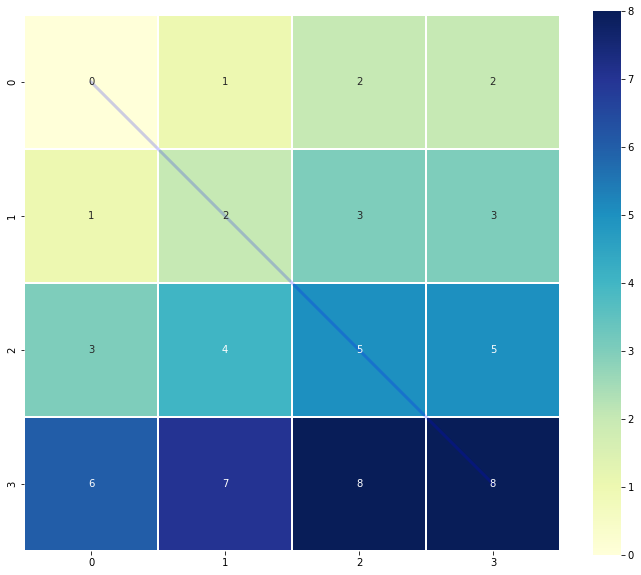

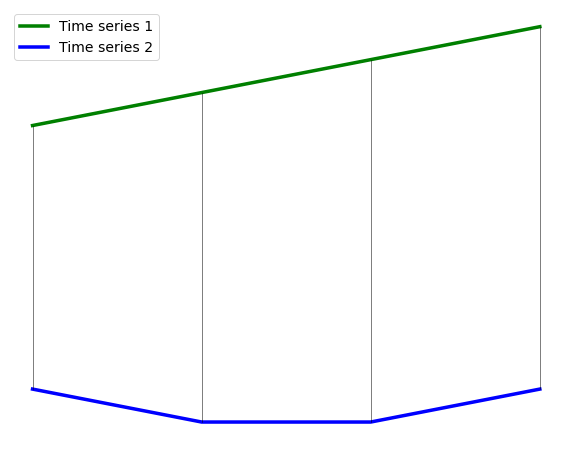

In [2]:
from scipy.spatial import distance
from dtwParallel import dtw_functions
s1 = [1,2,3,4]
s2 = [1,0,0,1]
dtw_functions.dtw(s1,s2, distance.euclidean, get_visualization=True)